1. Detect faces in images by Violet Johns Algorithm

I found 1 face(s)


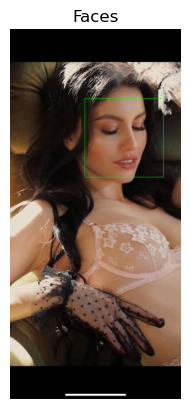

In [4]:
import cv2
from facedetector import FaceDetector
import imutils
from helper import draw

image = cv2.imread("../images/riana.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

fd = FaceDetector("haarcascade_frontalface_default.xml")
faceRects = fd.detect(gray, scaleFactor=1.1, minNeighbors=10, minSize=(30, 30))
print("I found {} face(s)".format(len(faceRects)))

for (x, y, w, h) in faceRects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

draw("Faces", image)


2. Detect faces from video or web camera

In [ ]:
import cv2
from facedetector import FaceDetector
import imutils
from helper import draw
from concurrent.futures import ThreadPoolExecutor

def process_frame(frame):
    frame = imutils.resize(frame, width=300)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faceRects = fd.detect(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faceRects:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # draw("Faces", frame)
    return frame


fd = FaceDetector("cascades/haarcascade_frontalface_default.xml")
camera = cv2.VideoCapture("video/adrian_face.mov")
#camera = cv2.VideoCapture(0)

frame_list = []

while True:
    (grabbed, frame) = camera.read()

    if not grabbed:
        break

    frame_list.append(frame)
    # frame = imutils.resize(frame, width=300)
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # faceRects = fd.detect(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # for (x, y, w, h) in faceRects:
    #     cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # draw("Faces", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


print("total frames: {}".format(len(frame_list)))

tasks = []
with ThreadPoolExecutor(max_workers=8) as worker_group:
    for frame in frame_list:
        tasks.append(worker_group.submit(process_frame, frame.copy()))

    rets = [task.result() for task in tasks]

for frame in rets:
    draw("", frame)

camera.release()
cv2.destroyAllWindows()


3. Detect cat faces

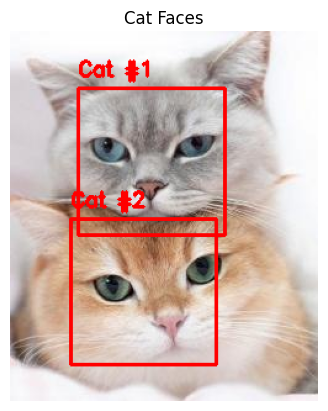

In [29]:
import cv2
from helper import draw

# load the input image and convert it to grayscale
image = cv2.imread("images/cat4.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load the cat detector Haar cascade, then detect cat faces
# in the input image
detector = cv2.CascadeClassifier("cascades/haarcascade_frontalcatface.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.3,
	minNeighbors=10, minSize=(75, 75))

# loop over the cat faces and draw a rectangle surrounding each
for (i, (x, y, w, h)) in enumerate(rects):
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.putText(image, "Cat #{}".format(i + 1), (x, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 0, 255), 2)

draw("Cat Faces", image)